In [1]:
# Import the necessary libraries that will be used in this code - pandas for data manipulation, numpy for numerical calculations, and seaborn for data visualization. The collections library is also imported to use the Counter function.
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [2]:
# load dataset
data = pd.read_csv("Resources/online_shoppers_intention.csv")
df = data.copy()
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [3]:
# display top 5 rows of the dataset
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Number of true (customer ended shopping) and false (customer ended not shopping) revenue (Bar Chart).

c:\Users\61415\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Revenue', ylabel='count'>

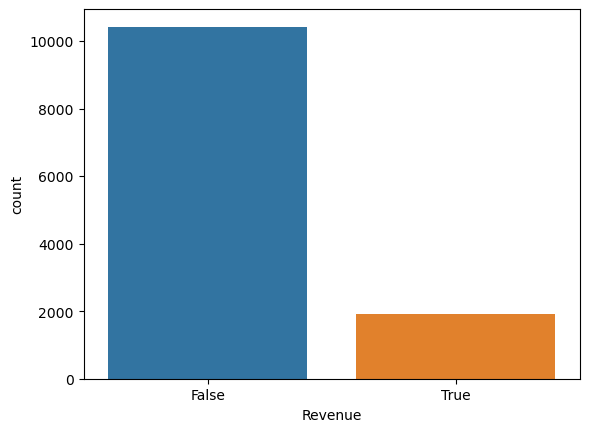

In [4]:
import seaborn as sns
sns.countplot(df['Revenue'])

In [5]:
#Assigining  Categorical Variables to non_numeric variable
non_numeric_columns = 'Month', 'VisitorType', 'Weekend', 'Revenue'

# Create an instance of the OrdinalEncoder to convert categorical variables into integers
encoder = OrdinalEncoder()

for col in non_numeric_columns:
    encoder.fit(df[[col]])
    df[col] = encoder.transform(df[[col]])

In [6]:
from sklearn.model_selection import train_test_split
# split data into train and test sets
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Perform Random Forest regression on the training data
# using 150 decision trees in the forest
# and fit the model to the input features X_train and target values y_train

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

In [8]:
# Calculate feature importances using the trained Random Forest model
# and select the top 10 most important features

importances = rf.feature_importances_  # array of feature importances
indices = np.argsort(importances)[::-1]  # indices of features sorted in descending order of importance
sort = indices[:10]  # select the top 10 features by index

Text(0.5, 0, 'Feature Importance')

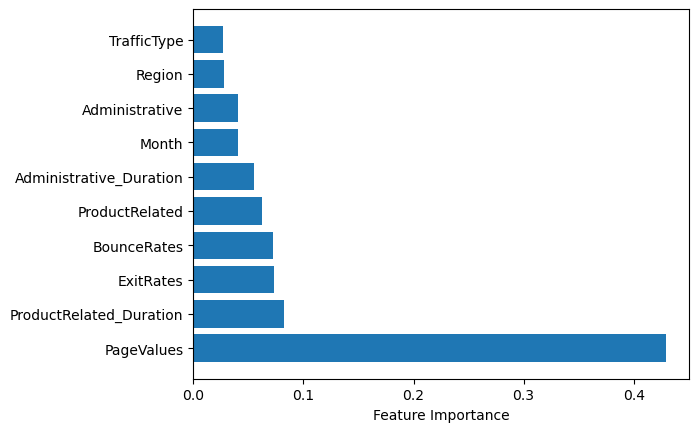

In [9]:
# Create a list of column labels for the top 10 features
# based on the sorted integer indices from previous step
labels = X.columns[sort]

# Create a horizontal bar plot to visualize the feature importances
# and label each bar with its corresponding column name
plt.barh(labels, rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [10]:
# Select only the top 10 features
X_top10 = X[labels]
X_top10.head()


,PageValues,ProductRelated_Duration,ExitRates,BounceRates,ProductRelated,Administrative_Duration,Month,Administrative,Region,TrafficType
0,0.0,0.000000,0.20,0.20,1,0.0,2.0,0,1,1
1,0.0,64.000000,0.10,0.00,2,0.0,2.0,0,1,2
2,0.0,0.000000,0.20,0.20,1,0.0,2.0,0,9,3
3,0.0,2.666667,0.14,0.05,2,0.0,2.0,0,2,4
4,0.0,627.500000,0.05,0.02,10,0.0,2.0,0,1,4


In [11]:
# Split the data into train and test sets using the new X_top10 dataframe
X_train, X_test, y_train, y_test = train_test_split(X_top10, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

# scale To 10 features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### •	Distribution of revenue over months.

The resulting bar plot shows the distribution of revenue over the months. The x-axis represents the months, and the y-axis represents the count of instances for each month. The bars are color-coded to show the revenue column's value, with blue representing False (no revenue) and orange representing True (revenue). The plot provides an easy-to-read visualization of the distribution of revenue over the months, allowing for easy comparison between the different months.

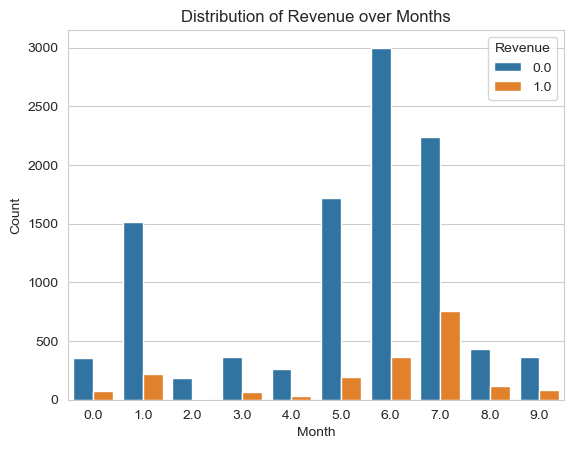

In [13]:
import seaborn as sns

# Set the style of the plot
sns.set_style("whitegrid")

# Create a barplot of the revenue distribution over months
sns.countplot(x="Month", hue="Revenue", data=df)

# Add labels to the plot
plt.title("Distribution of Revenue over Months")
plt.xlabel("Month")
plt.ylabel("Count")

# Show the plot
plt.show()

### Distribution of revenue over traffic type.


In this case, we are using the mean revenue for each traffic type because the traffic types are represented as numerical values without any meaningful labels.

If we had meaningful labels for the traffic types, we could use a count plot to show the number of occurrences of each traffic type for each revenue value (i.e., True or False). However, since we don't have labels for the traffic types, we can't use a count plot in this case. Instead, we can use the mean revenue for each traffic type as a proxy for the revenue generated by each traffic type.

For example, if we have 100 instances of traffic type 1 with a revenue value of True and 50 instances of traffic type 1 with a revenue value of False, the mean revenue for traffic type 1 would be (100 * 1 + 50 * 0) / (100 + 50) = 0.67. This mean value represents the average revenue generated by traffic type 1. We can then compare this mean revenue value to the mean revenue values for other traffic types to gain insight into which traffic types generate the most revenue on average.

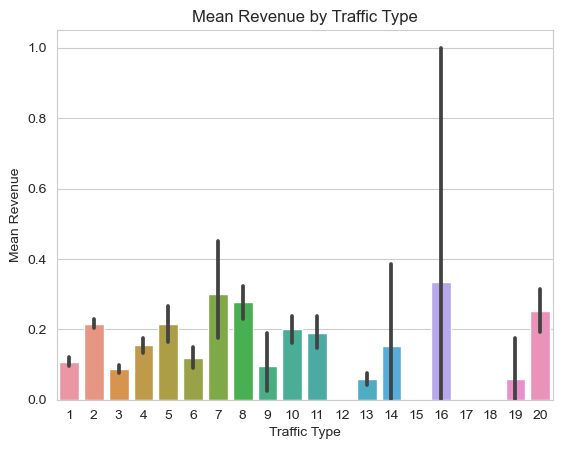

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="TrafficType", y="Revenue", data=df)
plt.title("Mean Revenue by Traffic Type")
plt.xlabel("Traffic Type")
plt.ylabel("Mean Revenue")
plt.show()

### Distribution of revenue over special day.

The code above uses the seaborn library to create a swarm plot of the distribution of revenue over the "SpecialDay" feature.

A swarm plot is a type of categorical scatter plot that displays the distribution of data points for each category along an axis. In this case, the "SpecialDay" values are shown along the x-axis, and the revenue values are shown along the y-axis. Each point on the plot represents a single data point from the dataset, with its location on the x-axis corresponding to its "SpecialDay" value and its location on the y-axis corresponding to its revenue value (0 or 1).

By using different colors for the revenue values, we can easily see how the distribution of revenue changes for each "SpecialDay" value. In this plot, orange points represent revenue=1, while blue points represent revenue=0.

The plot provides useful information about the relationship between the "SpecialDay" feature and the revenue outcome. For example, we can see that on special days (SpecialDay values of 0.4, 0.6, and 0.8), there are fewer instances of revenue=1 than on non-special days (SpecialDay values of 0.0 and 1.0). This could suggest that customers are less likely to make purchases on special days, or that the website is less effective at converting visitors into customers on these days. However, it's important to keep in mind that this plot only shows correlation, and not causation.

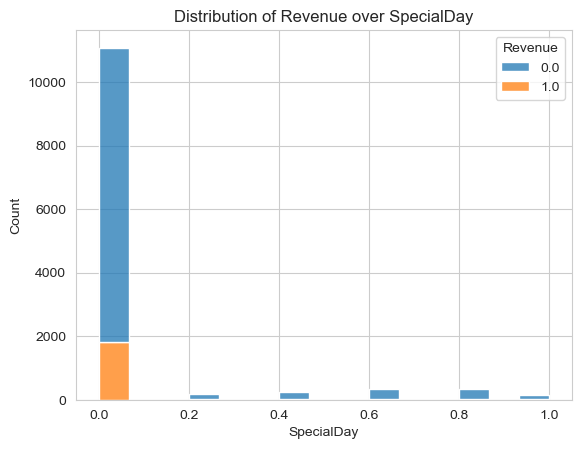

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Create a histogram of the revenue distribution over SpecialDay
sns.histplot(x="SpecialDay", hue="Revenue", data=df, multiple="stack")

# Add labels to the plot
plt.title("Distribution of Revenue over SpecialDay")
plt.xlabel("SpecialDay")
plt.ylabel("Count")

# Show the plot
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

result_dict = {}
# Helper function to summarize
def summarize_classification(y_test,y_pred):
    """
    As it's take the actual target labels of the test set and predicted label.
    and will Give the summary of the Goodness of fit of the mode on the Validation/test dataset.
    """
    acc = accuracy_score(y_test,y_pred,normalize=True)
    num_acc = accuracy_score(y_test,y_pred,normalize=False)
    
    prec = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    F1_score =  f1_score(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    
    
    return{'Accuracy:': acc,
           'Accuracy_count:': num_acc,
           'Precision:': prec,
           'Recall:': recall,
           'F1_score:':F1_score,
           'AUC_ROC:':auc_score}

## Building a Base Model

In [17]:

# Helper function to Build Model
def build_model(classifier_fn,
                name_of_y_col,
                name_of_x_cols,
                dataset,test_frac=0.2,
                show_plot_auc=None):
  
    """
    Builds end to end model and share the model summary.
    if show_plot_auc==True : Plot the AUC - ROC curve.
    """ 
    
    # Separating the  input features (X) and target variable (y)
    X = df.drop('Revenue', axis=1)
    Y = df['Revenue']
    
    # feature Scaling
    scale_x = StandardScaler()
    x = scale_x.fit_transform(X)
    
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
    
    model = classifier_fn(x_train,y_train)
    
    y_pred = model.predict(x_test)
    
    y_pred_train = model.predict(x_train)
    
    train_summary = summarize_classification(y_train,y_pred_train)
    test_summary = summarize_classification(y_test,y_pred)
    
    pred_result = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
    
    model_crosstab = pd.crosstab(pred_result.y_pred,pred_result.y_test)
    
    if show_plot_auc==True:
        plt.figure(figsize=(8,6))
        
        logit_roc_auc1 = roc_auc_score(y_train, model.predict(x_train))
        fpr1, tpr1, thresholds1 = roc_curve(y_train, model.predict_proba(x_train)[:,1])
        plt.plot(fpr1, tpr1, label='Class_Train (AUC = %0.2f)' % logit_roc_auc1)
            
        logit_roc_auc2 = roc_auc_score(y_test, model.predict(x_test))
        fpr2, tpr2, thresholds2 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
        plt.plot(fpr2, tpr2,label='Class_Test (AUC = %0.2f)' % logit_roc_auc2)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic(ROC-AUC)')
        plt.legend(loc="lower right")
        plt.show()
        
    
    return{'training':train_summary,
          'test':test_summary,
          'confusion_matrix':model_crosstab
          }

## Compare Results

In [18]:
# Helper function to compare the score of different Model.    
def compare_result():
    """
    Shows Train the Test data summary for the all the Model runned in form of data dictionary.
    """
    for key in result_dict:
        print('Classification: ',key)
        
        print()
        print('Training data:-')
        for score in result_dict[key]['training']:
            print(score,result_dict[key]['training'][score])
            
        print()
        print('Test Data:-')
        for score in result_dict[key]['test']:
            print(score,result_dict[key]['test'][score])
            
        print()

## Model 1: Neural Networks

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def dnn_fn(x_train, y_train, input_dim=17, output_dim=1):
    """
    Returns a deep neural network model for regression.
    """
    model = Sequential()
    model.add(Dense(units=64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=output_dim, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

    return model

In [24]:
result_dict['Revenue ~ DNN'] = build_model(dnn_fn, 'Revenue', X, df, show_plot_auc=True)

309/309 [==============================] - 1s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

## Model 2: Unsupervised Learning - K-Nearest Neighbours (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def knn_fn(x_train,y_train,n_neighbors=9,random_state=12):
    """
    Function to buld KNN Model for the given dataset
    """
    
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(x_train,y_train)
    
    return model


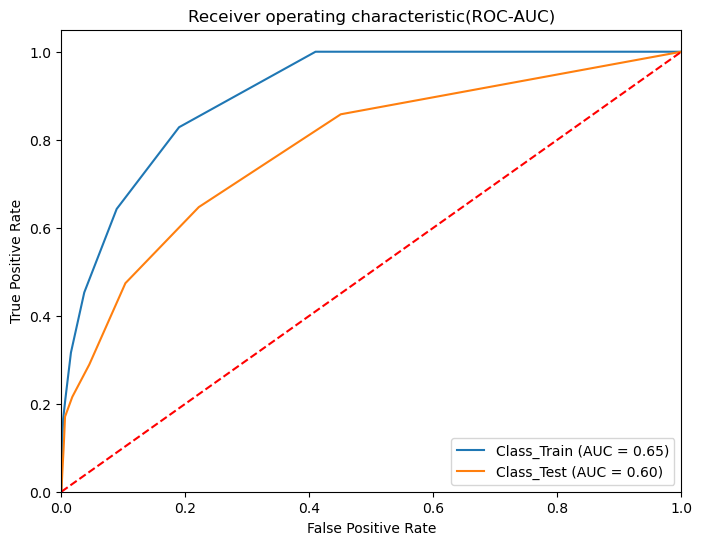

In [ ]:

result_dict['Revenue ~ KNN'] = \
    build_model(knn_fn,'Revenue',X,df,show_plot_auc=True)

In [ ]:
from sklearn.metrics import classification_report
y_pred = result_dict['Revenue ~ KNN']['test']['y_pred']
y_true = result_dict['Revenue ~ KNN']['test']['y_true']
print(classification_report(y_true, y_pred))

KeyError: 'Revenue ~ KNN'

## Model 3: Supervised Learning - Random Forest Classifier

def random_forest_fn(x_train,y_train):
    """
    Function to buld ensemble model using 50 decision trees for the given dataset
    """
    model = RandomForestClassifier(n_estimators= 50, max_depth = 15,random_state=12 )
    model.fit(x_train,y_train)
    
    return model

In [ ]:
result_dict['Revenue ~ Random_Forest'] = \
    build_model(random_forest_fn,'Revenue',features,df,show_plot_auc=True)

NameError: name 'random_forest_fn' is not defined

In [ ]:
compare_result()

Classification:  Revenue ~ KNN

Training data:-
Accuracy: 0.8839213300892133
Accuracy_count: 8719
Precision: 0.7846410684474123
Recall: 0.3162853297442799
F1_score: 0.4508393285371702
AUC_ROC: 0.6504439300905692

Test Data:-
Accuracy: 0.85117599351176
Accuracy_count: 2099
Precision: 0.7165354330708661
Recall: 0.2156398104265403
F1_score: 0.33151183970856096
AUC_ROC: 0.5990136429823504

